In [1]:
# Let's figure out how to produce a final variable list.

# I am a little anxious about how exactly to proceed. I feel uncertain about what path forward is best.

# But - I think there is value in trying to prototype this out.

# NGC 1333 is the smallest of the three regions (in terms of number of target sources), so I think it is wise to try there first.

# Also, it will be dope to inspect the variability rate among the "statistical sample" as defined by `bd_matching_v2`.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import warnings
warnings.filterwarnings("ignore")

In [3]:
# load up things. 
# Probably...

#ok, what was ...
# ah, there is some interesting and perhaps useful info in
# `make_table_of_source_properties.py`


In [4]:
from wuvars.analysis.bd_matching_v2 import match_ngc
from wuvars.data import spreadsheet, photometry, quality_classes

ngc_match = match_ngc()
ngc_q = quality_classes.load_q(7)
ngc_spread = spreadsheet.load_wserv_v2(7)

In [5]:
from wuvars.analysis.variability_selection_curved import curve_Stetson, sv_jh, sv_hk, sv_jk, sv_jhk
import wuvars.analysis.variability_selection as sv

In [6]:
ngc_match.approved

<Table length=103>
   SOURCEID    median_MEANMJDOBS     median_RA          median_DEC        median_JMHPNT    ...  Ksmag  e_Ksmag JHKref   SpT     Teff 
                                                                                           ...   mag     mag                         
    int64           float64           float64            float64             float64       ... float64 float64  str3  float64 float64
-------------- ----------------- ------------------ ------------------ ------------------- ... ------- ------- ------ ------- -------
44508746126979       56241.52595 0.9086759217997056 0.5461125721574945   0.689478874206543 ...    15.2    0.03    www    8.25  2632.5
44508746098759     56241.5245967 0.9096375539154813 0.5458383811009512  0.5259075164794922 ...   13.62    0.05    222    5.75 3023.75
44508746098738      56239.037275 0.9097342393491428 0.5455145894934741     0.7452392578125 ...   17.32    0.03    www     9.5  2286.5
44508746098719     56242.4354033 0.9098326628234742 0.5460170034908022  1.7535147666931152 ...   14.05    0.03    www     8.0  2710.0
44508746098671     56240.5163467 0.9101066779434371 0.5457280799302613   1.037515640258789 ...   15.23    0.03    www     8.0  2710.0
44508746127084       56243.57007 0.9101412911927445 0.5462864616736653  1.5919008255004883 ...   13.64    0.03    www     5.5  3057.5
44508746126973    56241.52527335 0.9102100822970738 0.5461004869369863  0.7155437469482422 ...   16.43    0.03    www     8.5  2555.0
44508746127515       56241.52595 0.9103344662371152 0.5474989086151968  1.1570491790771484 ...    17.7    0.03    www    10.0  2173.0
44508746128322     56242.4367867 0.9103907252963144 0.5463206543671744                  -- ...   14.27    0.03     ww     9.0  2400.0
44508746127117       56243.57007 0.9107389853925558  0.546174211052626  1.2388873100280762 ...   10.14    0.02    222     5.5  3057.5
44508746127412       56243.57007 0.9107769362925472 0.5471262837459905  0.8692340850830078 ...   12.63    0.03    222     6.0  2990.0
44508746098424    56240.02935835 0.9108903899132306 0.5457604272853571  0.7073726654052734 ...   17.03    0.03    www     9.0  2400.0
44508746098403     56241.5245967 0.9110140618931667 0.5443967315207437  1.5559921264648438 ...    12.7    0.03    ww2    8.25  2632.5
44508746127488    56243.00342835 0.9110373785984369 0.5474255422910967  1.3055191040039062 ...    15.4    0.03    www    8.25  2632.5
44508746098400      56242.436095 0.9110496190412438 0.5459739195807802   1.020054817199707 ...   10.91    0.02    222     6.5  2935.0
44508746126974     56260.4856033 0.9111216951390133 0.5461065316671737   2.472702980041504 ...   13.76    0.03    www     5.0  3125.0
44508746116084     56243.0047167 0.9112809411576543  0.546378127080938  0.9783883094787598 ...    9.18    0.02    222     5.0  3125.0
44508746116073     56242.4380467 0.9112828265185275 0.5467160349025866  0.9034557342529297 ...   17.69    0.03    www     9.5  2286.5
44508746107194    56243.98506335 0.9112841781851526 0.5458637878207351  0.6971445083618164 ...   12.12    0.03    222     5.0  3125.0
44508746107325    56243.98506335 0.9113624268857187 0.5456441580484562  0.5460853576660156 ...   12.03    0.02    222     7.5  2795.0
44508746107213    56243.98506335 0.9114185856701484 0.5458348201939816  0.6244821548461914 ...   12.48    0.03    222     5.0  3125.0
44508746107153    56243.57210335 0.9115035047287661 0.5459696675690817  0.8321337699890137 ...    11.6    0.02    222    5.25 3091.25
44508746107378    56243.98506335 0.9115654494653203 0.5455562012535679  0.9845056533813477 ...   14.28    0.03    www    8.25  2632.5
           ...               ...                ...                ...                 ... ...     ...     ...    ...     ...     ...
44508746117349     56243.0047167 0.9135000873335763  0.548387001654878  0.9043960571289062 ...   11.67    0.03    222     5.0  3125.0
44508746117326     56243.0047167 0.9135025410659375 0.5472112809251162  0.5933694839477539 ... 

In [7]:
# variables come from the following sources:
# 1. periodic (spreadsheet)
# 2. stetson cuts for v2, v1 (numerical criteria)
# 3. inspected Q0 (spreadsheet) 
# it will be valuable to avoid double-counting.

# there will then be three further classes
# 4. candidate variables
# 5. Q2/Q1 stars not selected as variable (call these "nonvariable")
# 6. Q0 stars not selected as variable.



In [8]:
import wuvars.analysis.variability_selection as sv

spread = spreadsheet.load_v2()


In [9]:
lc_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes/BD_lcs_v3"
spreadsheet_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes"

inspect_ngc = pd.read_csv(os.path.join(lc_dir, "inspection_ngc.csv"), skipinitialspace=True)
approved_sources_ngc = inspect_ngc['SOURCEID'][inspect_ngc['exclude?'] != 'yes']
period_sheet_ngc = pd.read_excel(
    os.path.join(spreadsheet_dir, "NGC_source_properties_periods_inspected.xlsx")
)

flags = ['Y', 'Yw', 'N', 'YfY', '?fY', 'YfYw', '?fYw', "YfN", "?fN"]
periodic_flags = [flag for flag in flags if flag[-1] in ('Y', 'w')]

periodic_ngc = period_sheet_ngc[np.in1d(period_sheet_ngc['Periodic?'], periodic_flags)]

periodic = {}
periodic[7] = periodic_ngc


In [10]:
periodic_ngc

index        SOURCEID           shortname A/S/C     RA_deg     DE_deg  \
3       3  44508746098719    ngc_003A_M8.0_Q0     A  52.129572  31.284470   
8       8  44508746128322  ngc_008S_M9.0_Q1HK     S  52.161546  31.301868   
12     12  44508746098403    ngc_012C_M8.2_Q2     C  52.197261  31.191635   
14     14  44508746098400  ngc_014A_M6.5_Q1JH     A  52.199298  31.282001   
19     19  44508746107325    ngc_019C_M7.5_Q2     C  52.217221  31.263107   
22     22  44508746107378    ngc_022C_M8.2_Q2     C  52.228853  31.258068   
23     23  44508746116168   ngc_023A_M6.0_Q1J     A  52.229011  31.304272   
24     24  44508746116177    ngc_024C_M6.5_Q2     C  52.230189  31.293157   
28     28  44508746116243    ngc_028C_M6.5_Q2     C  52.237233  31.346857   
34     34  44508746116314    ngc_034A_M8.0_Q0     A  52.242710  31.367268   
35     35  44508746116316    ngc_035C_M5.5_Q2     C  52.243434  31.382447   
41     41  44508746116558    ngc_041C_M8.2_Q2     C  52.261643  31.371484   
55     55  44508746116731    ngc_055C_M7.8_Q2     C  52.279843  31.389678   
57     57  44508746117253    ngc_057A_M6.0_Q0     A  52.287855  31.384914   
60     60  44508746116800    ngc_060C_M5.5_Q2     C  52.288870  31.351150   
63     63  44508746116840    ngc_063C_M5.0_Q2     C  52.293590  31.393015   
67     67  44508746117257    ngc_067C_M8.0_Q2     C  52.297204  31.382516   
68     68  44508746116914    ngc_068C_M4.5_Q2     C  52.298516  31.343745   
70     70  44508746116949    ngc_070C_M9.0_Q2     C  52.301097  31.385308   
71     71  44508746116989    ngc_071C_M6.2_Q2     C  52.303311  31.335457   
72     72  44508746116994    ngc_072C_M5.2_Q2     C  52.303789  31.391498   
73     73  44508746116999    ngc_073C_M7.5_Q2     C  52.304337  31.293970   
82     82  44508746117406    ngc_082C_M4.8_Q2     C  52.346485  31.341754   
85     85  44508746117427    ngc_085C_M5.5_Q2     C  52.353510  31.401731   
88     88  44508746107212    ngc_088C_M7.5_Q2     C  52.367332  31.274579   
90     90  44508746117537    ngc_090C_M4.5_Q2     C  52.374121  31.350725   
92     92  44508746117569    ngc_092C_M5.5_Q2     C  52.381446  31.424379   
93     93  44508746117584    ngc_093C_M4.5_Q2     C  52.385711  31.410258   
99     99  44508746117684    ngc_099C_M6.8_Q2     C  52.407192  31.367371   

        J_mag      H_mag      K_mag     Teff  ...  period_H  per_amp_H  \
3   17.055401  15.300561  13.979826  2710.00  ...  0.928243   0.018484   
8         NaN  17.153387  14.030204  2400.00  ...  1.695483   0.099755   
12  15.351969  13.799438  12.671055  2632.50  ...  4.105073   0.023329   
14  12.856623  11.830180  10.903027  2935.00  ...  3.795051   0.054969   
19  13.013573  12.468603  11.960729  2795.00  ...  2.282574   0.029290   
22  15.999459  15.014597  14.218838  2632.50  ...  3.397879   0.015207   
23  17.475994  14.832509  13.160979  2990.00  ...  1.356294   0.012844   
24  15.092044  14.158556  13.459476  2935.00  ...  1.415022   0.012571   
28  15.395680  14.528490  13.862526  2935.00  ...  3.438775   0.008777   
34  14.583902  13.286686  12.230022  2710.00  ...  0.163478   0.074888   
35  15.261045  14.291248  13.593973  3057.50  ...  1.552066   0.009576   
41  16.920006  14.967948  13.451156  2632.50  ...  2.148219   0.024655   
55  18.066397  16.680508  15.645616  2752.50  ...  4.382103   0.036622   
57  14.540582  12.947479  11.740499  2990.00  ...  3.428165   0.041537   
60  16.238646  14.342051  13.056829  3057.50  ...  0.083072   0.029857   
63  15.581881  13.902950  12.787964  3125.00  ...  4.140769   0.028913   
67  14.779911  13.524960  12.527006  2710.00  ...  3.167551   0.022695   
68  15.282961  13.651619  12.661796  3197.50  ...  2.228155   0.015344   
70  18.159920  16.426928  15.037615  2400.00  ...  2.201664   0.022168   
71  14.511284  13.811853  13.299660  2962.50  ...  1.209185   0.022120   
72  13.376711  12.599762  12.047754  3091.25  ...  2.442589   0.015859   
73  15.165166  14.658216  14.159208  2795.00  ...  3.160543   0.0

In [11]:
ngc_variables = periodic_ngc['SOURCEID'].values


In [12]:
inspect_onc = pd.read_csv(os.path.join(lc_dir, "inspection_onc.csv"), skipinitialspace=True)
inspect_ngc = pd.read_csv(os.path.join(lc_dir, "inspection_ngc.csv"), skipinitialspace=True)
inspect_ic = pd.read_csv(os.path.join(lc_dir, "inspection_ic.csv"), skipinitialspace=True)

approved_sources_onc = inspect_onc['SOURCEID'][inspect_onc['exclude?'] != 'yes']
approved_sources_ngc = inspect_ngc['SOURCEID'][inspect_ngc['exclude?'] != 'yes']
approved_sources_ic = inspect_ic['SOURCEID'][inspect_ic['exclude?'] != 'yes']

approved = {}
approved[5] = approved_sources_onc
approved[7] = approved_sources_ngc
approved[8] = approved_sources_ic

In [18]:
load_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/stetson_v_mag"


StetsonJHK_dict = {}
StetsonJHK_dict_95 = {}
StetsonJHK_dict_50 = {}

wserv = 7
r997 = np.load(
    os.path.join(load_dir, f"WSERV{wserv}_result_grid_997.npy")
)
StetsonJHK_dict[wserv] = r997
r95 = np.load(
    os.path.join(load_dir, f"WSERV{wserv}_result_grid_95.npy")
)
StetsonJHK_dict_95[wserv] = r95    
r50 = np.load(
    os.path.join(load_dir, f"WSERV{wserv}_result_grid_50.npy")
)
StetsonJHK_dict_50[wserv] = r50     

In [22]:
wserv = 7

In [192]:
wserv=7
n_min=80
n_max=160

ds = spread[f'wserv{wserv}']

q0 = sv.sq0(ds, n_min, n_max)
#         q1 = sq1(ds, n_min, n_max)

q1_j = sv.sq1_j(ds, n_min, n_max)
q1_h = sv.sq1_h(ds, n_min, n_max)
q1_k = sv.sq1_k(ds, n_min, n_max)

q2 = sv.sq2(ds, n_min, n_max)

#         v0 = sq0_variables(ds, n_min, n_max, Stetson_cutoff=S)
#         v1 = sq1_variables(ds, n_min, n_max, Stetson_cutoff=S)
#         v2 = sq2_variables(ds, n_min, n_max, Stetson_cutoff=S)
suffix_997 = '_m_997'
suffix_95 = '_m_95'
curve_Stetson(ds, StetsonJHK_dict[wserv][0], StetsonJHK_dict[wserv][1], '_m_997')
curve_Stetson(ds, StetsonJHK_dict_95[wserv][0], StetsonJHK_dict_95[wserv][1], '_m_95')
for bands in ['JH', 'JK', 'HK']:
    curve_Stetson(
        ds, 
        StetsonJHK_dict[wserv][0], 
        StetsonJHK_dict[wserv][1], 
        '_m_997', 
        input_column=f'Stetson_{bands}'
    )

v_jhk = sv_jhk(ds, Stetson_cutoff=0, suffix=suffix_997)        
#         v2 = sq2_variables()
v_jh = sv_jh(ds, Stetson_cutoff=0, suffix=suffix_997)        
v_jk = sv_jk(ds, Stetson_cutoff=0, suffix=suffix_997)        
v_hk = sv_hk(ds, Stetson_cutoff=0, suffix=suffix_997)

v2 = q2 & (v_jhk | v_jk | v_hk | v_jh)

v1_jh = q1_j & q1_h & v_jh
v1_jk = q1_j & q1_k & v_jk
v1_hk = q1_h & q1_k & v_hk

v1 = (v1_jh & q1_j & q1_h) | (v1_hk & q1_k & q1_h) | (v1_jk & q1_j & q1_k) | (q2 & (v_jhk | v_jk | v_hk | v_jh))

v_ = v1 | v2

v0 = (v_jhk | v1_jh | v1_jk | v1_hk) & ~v1 & ~v2

v_jhk_cand = sv_jhk(ds, Stetson_cutoff=0, suffix=suffix_95)   

v_cand = q2 & v_jhk_cand & ~v_

bd = np.in1d(ds.index, approved[wserv].values)
per_bd = np.in1d(ds.index, periodic[wserv].values)

print(f"WSERV{wserv}:")
print(f"  VLMS stars in our data: {np.sum(bd)}")
print(f"  VLMS Q=2 stars: {np.sum(bd & q2)}")
print(f"  VLMS Q=2 variables (ignoring periodicity): {np.sum(bd & q2 & v2)}")
print(f"  VLMS Q=2 'almost' variables: {np.sum(bd & q2 & v_jhk_cand & ~v2)}")
print(f"  VLMS Q=2 periodic: {np.sum(bd & q2 & per_bd)}")
print(f"  VLMS Q=2 variables (incl. periodics): {np.sum(bd & q2 & (v2 | per_bd))}")
print("")
print(f"BDs:                {np.sum(bd)}")
print(f"BDs (Q=2):          {np.sum(bd & q2)}")
print(f"Periodic BDs:       {np.sum(bd & per_bd)}")
print(f"Periodic BDs (Q=2): {np.sum(bd & per_bd & q2)}")

print(f"Variable BDs (Q=2): {np.sum(bd & v2)}")
print(f"  '' - periodics  : {np.sum(bd & v2 & ~per_bd)}")
print(f"Variable BDs (Q=1): {np.sum(bd & v1)}")
print(f"  '' - v2:          {np.sum(bd & v1 & ~v2)}")

print(f"V0 BDs (Q=0):       {np.sum(bd & v0)}")
print(f"Variable BDs (Q=1+2+per): {np.sum(bd & (v1 | v2 | per_bd))}")    
print("\n\n")


variable_sourceids = []

#### PRINTING PERIODIC VARIABLES ####

print(f"Periodic variables ({np.sum(bd & per_bd)}): ", ds[bd & per_bd].index)
variable_sourceids.append(ds[bd & per_bd].index)

#### PRINTING NONPERIODIC VARIABLES ####

print(f"Nonperiodic variables ({np.sum(bd & v_ & ~per_bd)}): ", None and ds[bd & v_ & ~per_bd].index)

#### PRINTING NONPERIODIC VARIABLE CANDIDATES ####

print(f"Nonperiodic variable candidates ({np.sum(bd & v_cand & ~per_bd)}): ", None and ds[bd & v_cand & ~per_bd].index)

#### PRINTING NONPERIODIC VARIABLE CANDIDATES ####

print(f"Nonperiodic variable followup candidates ({np.sum(bd & v0 & ~v_cand & ~per_bd)}): ", None and ds[bd & v0 & ~v_cand & ~per_bd].index)

#### PRINTING NONVARIABLES ####

print(f"Nonvariables ({np.sum(bd & ~v0 & ~v_cand & ~v_ & ~per_bd)}): ", None and ds[bd & ~v0 & ~v_cand & ~v_ & ~per_bd].index)


WSERV7:
  VLMS stars in our data: 103
  VLMS Q=2 stars: 70
  VLMS Q=2 variables (ignoring periodicity): 29
  VLMS Q=2 'almost' variables: 9
  VLMS Q=2 periodic: 23
  VLMS Q=2 variables (incl. periodics): 35

BDs:                103
BDs (Q=2):          70
Periodic BDs:       29
Periodic BDs (Q=2): 23
Variable BDs (Q=2): 29
  '' - periodics  : 12
Variable BDs (Q=1): 31
  '' - v2:          2
V0 BDs (Q=0):       10
Variable BDs (Q=1+2+per): 41



Periodic variables (29):  Int64Index([44508746098400, 44508746098403, 44508746098719, 44508746107212,
            44508746107325, 44508746107378, 44508746116168, 44508746116177,
            44508746116243, 44508746116314, 44508746116316, 44508746116558,
            44508746116731, 44508746116800, 44508746116840, 44508746116914,
            44508746116949, 44508746116989, 44508746116994, 44508746116999,
            44508746117253, 44508746117257, 44508746117406, 44508746117427,
            44508746117537, 44508746117569, 44508746117584, 44508746117

# Some off the cuff brainstorming

Imagine I want to select all the variables right now. (for, e.g., NGC 1333). How would I do that?

Let's say I want enough information to construct 

(a) an HR diagram and

(b) a map.



In [28]:
%run ../bd_matching_v2
onc_match = match_onc()
ngc_match = match_ngc()
ic_match = match_ic()

In [29]:
# for item in [onc_match.all_matches, onc_match.lowmass, onc_match.approved, onc_match.statistical, onc_match.color]:

#     print(f"{len(item)}")
print("ONC:")
for attr, value in onc_match.__dict__.items():
    if attr != 'not_lowmass':
        print(f"{attr:13s}", len(value))
print('')
print("NGC 1333:")
for attr, value in ngc_match.__dict__.items():
    if attr != 'not_lowmass':
        print(f"{attr:13s}", len(value))
print('')
print("IC 348:")
for attr, value in ic_match.__dict__.items():
    if attr != 'not_lowmass':
        print(f"{attr:13s}", len(value))

ONC:
all_matches   775
lowmass       394
approved      336
statistical   215
color         196

NGC 1333:
all_matches   186
lowmass       105
approved      103
statistical   69
color         68

IC 348:
all_matches   462
lowmass       234
approved      225
statistical   181
color         170


## Let's focus on NGC 1333 (the smallest! and therefore most manageable!) for now.



In [30]:
print("NGC 1333:")
for attr, value in ngc_match.__dict__.items():
    if attr != 'not_lowmass':
        print(f"{attr:13s}", len(value))

NGC 1333:
all_matches   186
lowmass       105
approved      103
statistical   69
color         68


There are 103 "approved" sources. That is the **entirety** of our input sample (as far as any variability analysis is concerned).

Imagine we were to make a map of it. What would that look like? (Let's borrow from... `Testing bd_matching_v2`.)

57.29577951308232


Text(0.5, 1.0, 'All approved matches in NGC 1333. (n=103)')

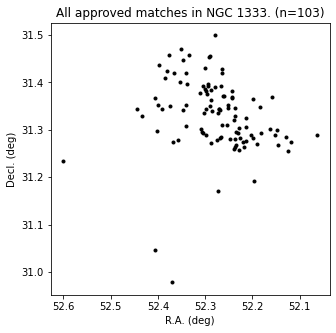

In [38]:
rad2dec = np.degrees(1)
print(rad2dec)

plt.figure(figsize=(5,5))
plt.plot(rad2dec*ngc_match.approved['median_RA'], rad2dec*ngc_match.approved['median_DEC'], 'k.')
plt.gca().invert_xaxis()
plt.xlabel("R.A. (deg)")
plt.ylabel("Decl. (deg)")
plt.title("All approved matches in NGC 1333. (n=103)")

Now imagine we wanted to make an HR diagram of the same sources...

[Text(4.0, 0, 'M4'),
 Text(6.0, 0, 'M6'),
 Text(8.0, 0, 'M8'),
 Text(10.0, 0, 'L0'),
 Text(12.0, 0, 'L2')]

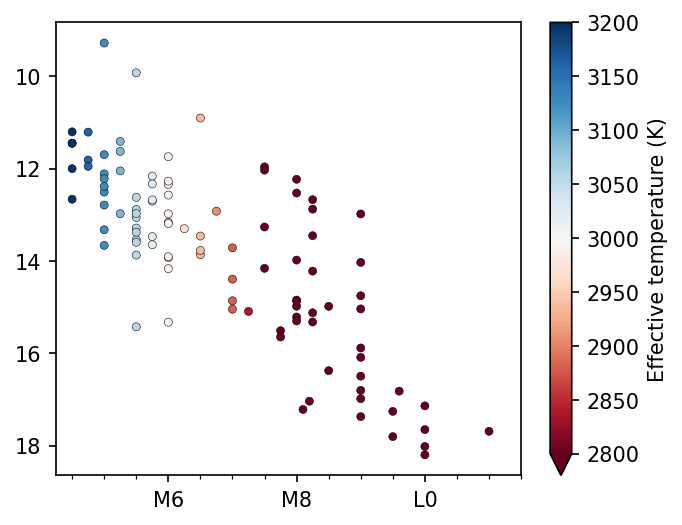

In [95]:
fig = plt.figure(figsize=(5,4), dpi=150)
ax = fig.add_subplot(111)

sc = ax.scatter(
    ngc_match.approved['SpT'], 
    ngc_match.approved['median_KAPERMAG3'], 
    s=15, 
    ec='k',
    linewidths=0.25,
    c=ngc_match.approved['Teff'],
    cmap='RdBu',
    vmin=2800,
    vmax=3200
)

ax.invert_yaxis()    

cbar = plt.colorbar(sc, extend='min')
cbar.set_label("Effective temperature (K)")

ax.set_xlim(4.25, 11.5)

xticks = ax.get_xticks()
xticks_minor = np.arange(4.5, 12, 0.5)
ax.set_xticks(xticks_minor, minor=True)
new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
ax.set_xticklabels(new_xtick_labels)

Okay, now... how can we do SUBSETS of that? Instead of "all approved", let's say "all Q2 sources" or "all periodic variables" etc.

In fact let's do exactly those two cuts.

70


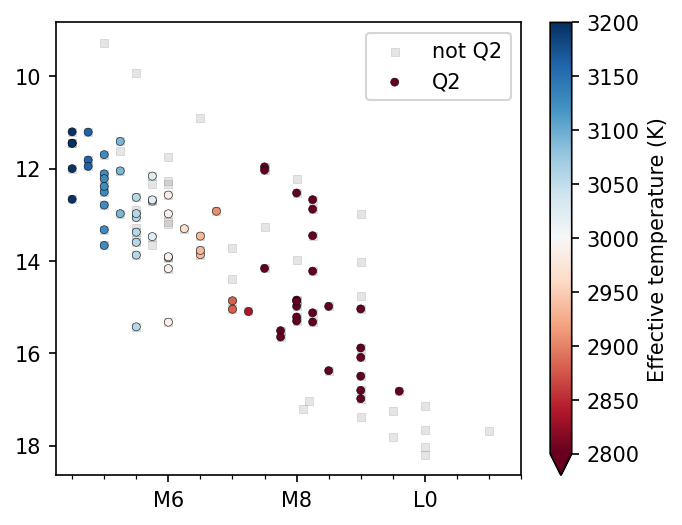

In [119]:
from wuvars.data import spreadsheet, photometry, quality_classes

ngc_q = quality_classes.load_q(7)
q2_true = ngc_q.q2[ngc_q.q2 == True]

ngc_q2 = np.in1d(ngc_match.approved['SOURCEID'], q2_true.index)

print(len(ngc_match.approved[ngc_q2]))

fig = plt.figure(figsize=(5,4), dpi=150)
ax = fig.add_subplot(111)

ax.scatter(
    ngc_match.approved['SpT'], 
    ngc_match.approved['median_KAPERMAG3'], 
    marker='s',
    s=15, 
    ec='k',
    linewidths=0.25,
    c='0.5',
    alpha=0.2,
    label="not Q2"
)

sc = ax.scatter(
    ngc_match.approved['SpT'][ngc_q2], 
    ngc_match.approved['median_KAPERMAG3'][ngc_q2], 
    s=15, 
    ec='k',
    linewidths=0.25,
    c=ngc_match.approved['Teff'][ngc_q2],
    cmap='RdBu',
    vmin=2800,
    vmax=3200,
    label='Q2'
)

ax.invert_yaxis()    

cbar = plt.colorbar(sc, extend='min')
cbar.set_label("Effective temperature (K)")

ax.set_xlim(4.25, 11.5)

xticks = ax.get_xticks()
xticks_minor = np.arange(4.5, 12, 0.5)
ax.set_xticks(xticks_minor, minor=True)
new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
ax.set_xticklabels(new_xtick_labels)

plt.legend()

The above plot shows an example of making a Q2 criterion cut. Not bad. What does it look like to do it for just the periodic variables?

In [126]:
periodic_ngc

ngc_per = np.in1d(ngc_match.approved['SOURCEID'], periodic_ngc['SOURCEID'])

print(len(ngc_match.approved[ngc_per]))

29


Text(0.5, 1.0, 'Periodic variables in NGC 1333: an HR diagram')

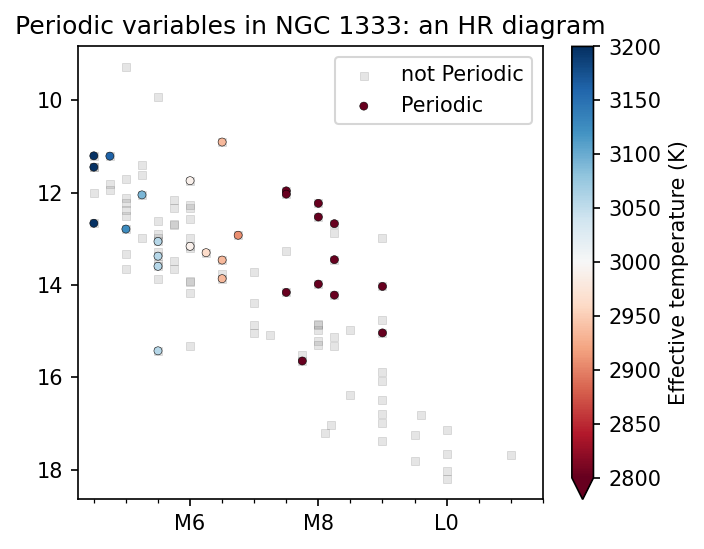

In [191]:
criterion = ngc_per
criterion_name = "Periodic"

fig = plt.figure(figsize=(5,4), dpi=150)
ax = fig.add_subplot(111)

ax.scatter(
    ngc_match.approved['SpT'], 
    ngc_match.approved['median_KAPERMAG3'], 
    marker='s',
    s=15, 
    ec='k',
    linewidths=0.25,
    c='0.5',
    alpha=0.2,
    label=f"not {criterion_name}"
)

sc = ax.scatter(
    ngc_match.approved['SpT'][criterion], 
    ngc_match.approved['median_KAPERMAG3'][criterion], 
    s=15, 
    ec='k',
    linewidths=0.25,
    c=ngc_match.approved['Teff'][criterion],
    cmap='RdBu',
    vmin=2800,
    vmax=3200,
    label=f'{criterion_name}'
)

ax.invert_yaxis()    

cbar = plt.colorbar(sc, extend='min')
cbar.set_label("Effective temperature (K)")

ax.set_xlim(4.25, 11.5)

xticks = ax.get_xticks()
xticks_minor = np.arange(4.5, 12, 0.5)
ax.set_xticks(xticks_minor, minor=True)
new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
ax.set_xticklabels(new_xtick_labels)

plt.legend()
plt.title("Periodic variables in NGC 1333: an HR diagram")

# Dope. Now, can we do it for q0 variables?



In [135]:
sheets = pd.read_excel("Q0_nonperiodic_followup.xlsx", sheet_name=None)

q0_variables = sheets['NGC']['SOURCEID'][sheets['NGC']['VARIABLE'] == 1]

ngc_v0 = np.in1d(ngc_match.approved['SOURCEID'], q0_variables)
print(len(ngc_match.approved[ngc_v0]))

6


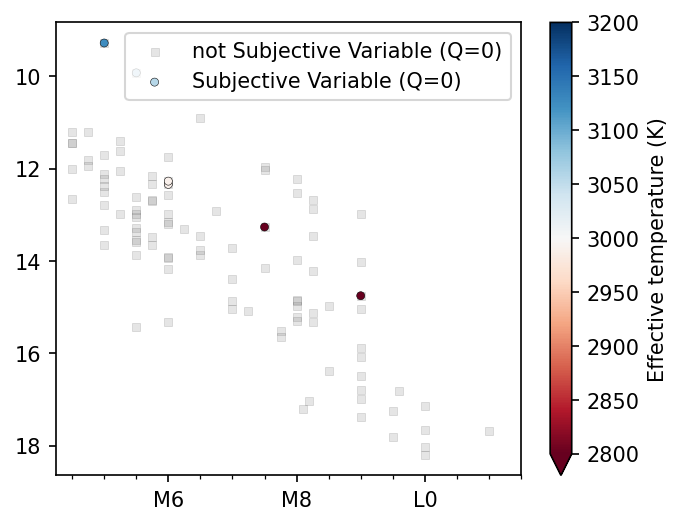

In [136]:
criterion = ngc_v0
criterion_name = "Subjective Variable (Q=0)"

fig = plt.figure(figsize=(5,4), dpi=150)
ax = fig.add_subplot(111)

ax.scatter(
    ngc_match.approved['SpT'], 
    ngc_match.approved['median_KAPERMAG3'], 
    marker='s',
    s=15, 
    ec='k',
    linewidths=0.25,
    c='0.5',
    alpha=0.2,
    label=f"not {criterion_name}"
)

sc = ax.scatter(
    ngc_match.approved['SpT'][criterion], 
    ngc_match.approved['median_KAPERMAG3'][criterion], 
    s=15, 
    ec='k',
    linewidths=0.25,
    c=ngc_match.approved['Teff'][criterion],
    cmap='RdBu',
    vmin=2800,
    vmax=3200,
    label=f'{criterion_name}'
)

ax.invert_yaxis()    

cbar = plt.colorbar(sc, extend='min')
cbar.set_label("Effective temperature (K)")

ax.set_xlim(4.25, 11.5)

xticks = ax.get_xticks()
xticks_minor = np.arange(4.5, 12, 0.5)
ax.set_xticks(xticks_minor, minor=True)
new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
ax.set_xticklabels(new_xtick_labels)

plt.legend()

# ... Can we do it for ALL VARIABLES?

In [163]:
# ngc_vars = v2 & v1 & v_per & v0

# I'm calling this `ref` i.e. "reference"
ref = np.in1d(ds.index, ngc_match.approved['SOURCEID'])

# np.sum(v2), np.sum(v1), np.sum(v0)
print(np.sum(ref & q2), np.sum(ref & v2), np.sum(ref & v1), np.sum(ref & v_per), np.sum(ref & q2 & v_per), np.sum(ref & v0_conf))


np.sum(ref & (v2 | v1 | v_per | v0_conf)), np.sum(ref)

70 29 31 29 23 6


(47, 103)

In [159]:
v2 = q2 & (v_jhk | v_jk | v_hk | v_jh)

v1_jh = q1_j & q1_h & v_jh
v1_jk = q1_j & q1_k & v_jk
v1_hk = q1_h & q1_k & v_hk

v1 = (v1_jh & q1_j & q1_h) | (v1_hk & q1_k & q1_h) | (v1_jk & q1_j & q1_k) | (q2 & (v_jhk | v_jk | v_hk | v_jh))

v_per = np.in1d(ds.index, periodic[wserv].values)

v0_conf = np.in1d(ds.index, q0_variables)

In [165]:
np.sum(ref & v1 & ~v2)

2

In [167]:
np.sum(ref & v_per)

29

In [168]:
np.sum(ref & v_per & ~(v1 | v2))

10

In [169]:
np.sum(ref & v0_conf)

6

# Ok!
 
### It looks like there are 47 variables in NGC 1333 among the 103 brown dwarfs suitable for analysis:

- 29 Q=2 Stetson variables
- 31 Q=1 Stetson variables (only 2 were not also Q=2 variables)
- 29 periodic variables (only 10 were not also Stetson variables)
- 6 were subjectively-selected Q=0 variables 



In [170]:
29 + 2 + 10 +6

47

In [173]:
all_variables = (ref & (v2 | v1 | v_per | v0_conf))
np.sum(all_variables)

47

In [175]:
all_variables_SOURCEIDs = ds[all_variables].index
all_variables_SOURCEIDs

Int64Index([44508746095665, 44508746098400, 44508746098403, 44508746098719,
            44508746107136, 44508746107194, 44508746107203, 44508746107207,
            44508746107212, 44508746107213, 44508746107325, 44508746107378,
            44508746116084, 44508746116168, 44508746116177, 44508746116243,
            44508746116250, 44508746116314, 44508746116316, 44508746116436,
            44508746116558, 44508746116567, 44508746116661, 44508746116672,
            44508746116674, 44508746116731, 44508746116800, 44508746116809,
            44508746116840, 44508746116914, 44508746116949, 44508746116989,
            44508746116994, 44508746116999, 44508746117253, 44508746117257,
            44508746117401, 44508746117406, 44508746117427, 44508746117537,
            44508746117569, 44508746117584, 44508746117684, 44508746117813,
            44508746121420, 44508746127117, 44508746128322],
           dtype='int64', name='SOURCEID')

In [171]:
# There we go. That's money. OK - how do we put it all together?

Text(0, 0.5, 'median K mag')

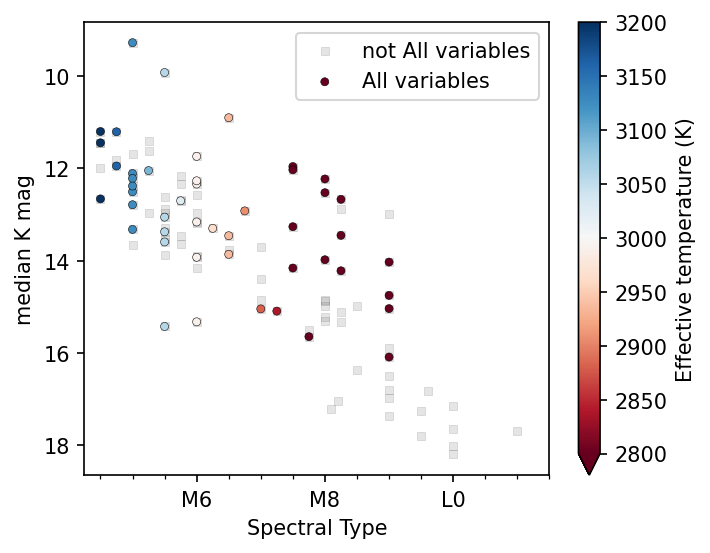

In [190]:
ngc_allvars = np.in1d(ngc_match.approved['SOURCEID'], ds[all_variables].index)

criterion = ngc_allvars
criterion_name = "All variables"

fig = plt.figure(figsize=(5,4), dpi=150)
ax = fig.add_subplot(111)

ax.scatter(
    ngc_match.approved['SpT'], 
    ngc_match.approved['median_KAPERMAG3'], 
    marker='s',
    s=15, 
    ec='k',
    linewidths=0.25,
    c='0.5',
    alpha=0.2,
    label=f"not {criterion_name}"
)

sc = ax.scatter(
    ngc_match.approved['SpT'][criterion], 
    ngc_match.approved['median_KAPERMAG3'][criterion], 
    s=15, 
    ec='k',
    linewidths=0.25,
    c=ngc_match.approved['Teff'][criterion],
    cmap='RdBu',
    vmin=2800,
    vmax=3200,
    label=f'{criterion_name}'
)

ax.invert_yaxis()    

cbar = plt.colorbar(sc, extend='min')
cbar.set_label("Effective temperature (K)")

ax.set_xlim(4.25, 11.5)

xticks = ax.get_xticks()
xticks_minor = np.arange(4.5, 12, 0.5)
ax.set_xticks(xticks_minor, minor=True)
new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
ax.set_xticklabels(new_xtick_labels)

plt.legend()

plt.xlabel("Spectral Type")
plt.ylabel("median K mag")

# Lessons Learned

* I think the best way to handle the various selections is to operate in "ds" space (working with boolean arrays of membership that are relative to the summary spreadsheet) and then casting to the `match` table only at the very end.


In [184]:
from wuvars.plotting.lightcurve import simple_lc_scatter_brokenaxes

In [186]:
wserv = 7

onc = {}
ngc = {}
ic = {}
dicts = [onc, ngc, ic]
dict_dict = {5: onc, 7:ngc, 8:ic}
ngc["dat"] = photometry.group_wserv_v2(photometry.load_wserv_v2(7))
ngc["q"] = quality_classes.load_q(7)
ngc["spread"] = spreadsheet.load_wserv_v2(7)
ngc["cmap"] = "jet"
ngc['breaks'] = []

Loading WSERV7 photometry data... DONE (elapsed time: 0.29s)


44508746095665
44508746098400
44508746098403
44508746098719
44508746107136
44508746107194
44508746107203
44508746107207
44508746107212
44508746107213
44508746107325
44508746107378
44508746116084
44508746116168
44508746116177
44508746116243
44508746116250
44508746116314
44508746116316
44508746116436
44508746116558
44508746116567
44508746116661
44508746116672
44508746116674
44508746116731
44508746116800
44508746116809
44508746116840
44508746116914
44508746116949
44508746116989
44508746116994
44508746116999
44508746117253
44508746117257
44508746117401
44508746117406
44508746117427
44508746117537
44508746117569
44508746117584
44508746117684
44508746117813
44508746121420
44508746127117
44508746128322


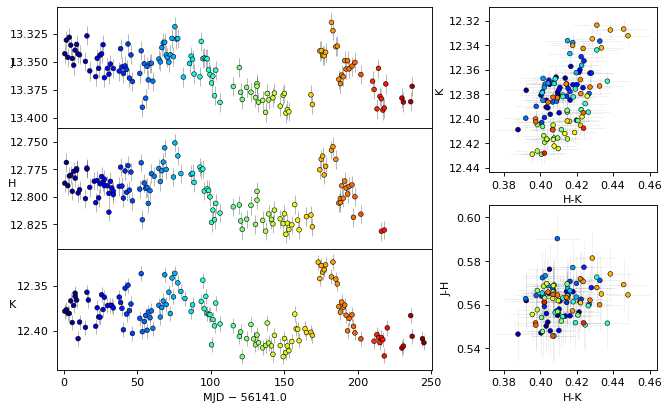

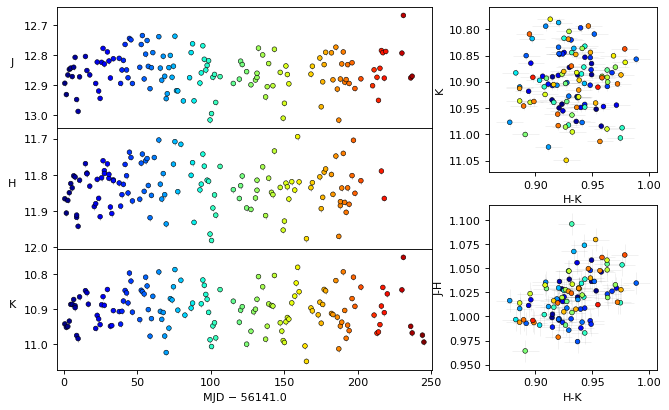

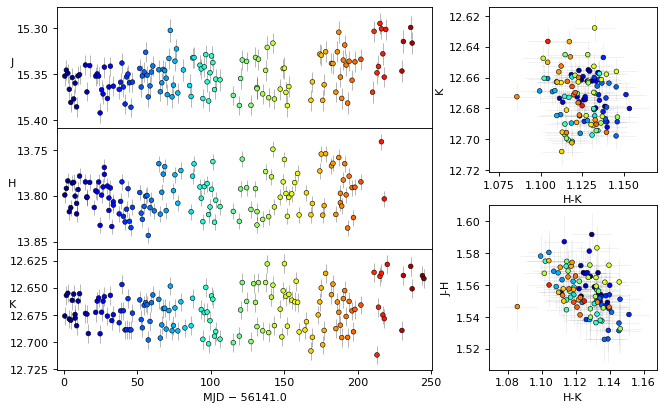

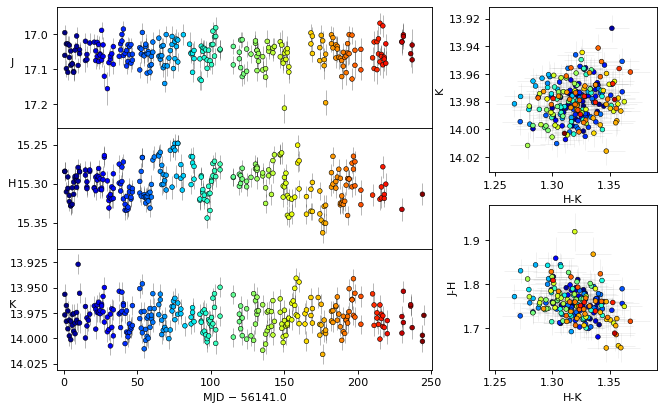

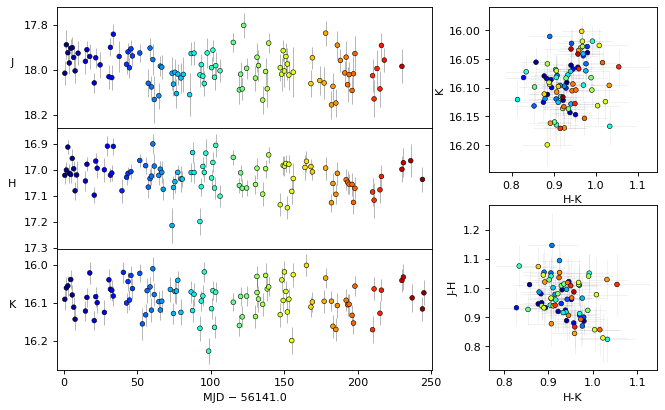

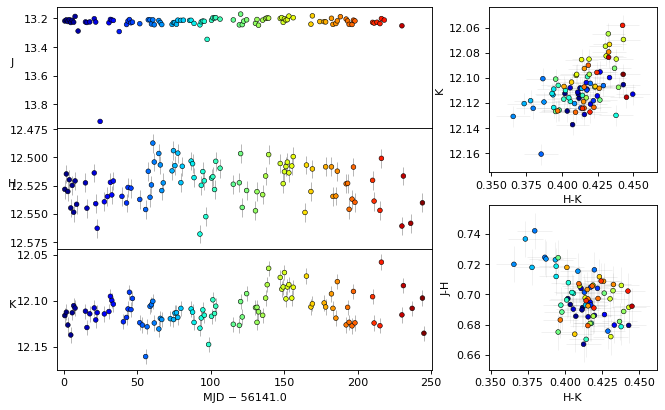

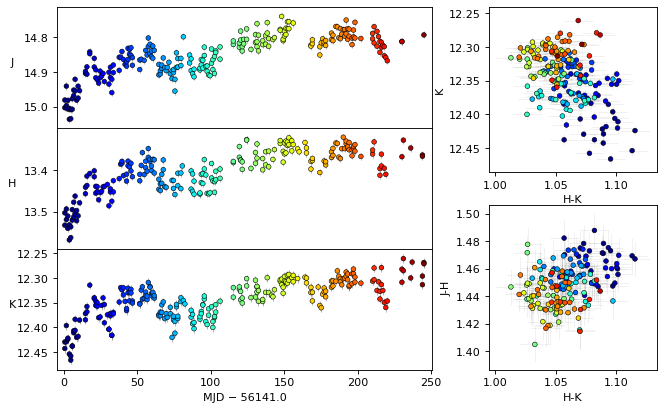

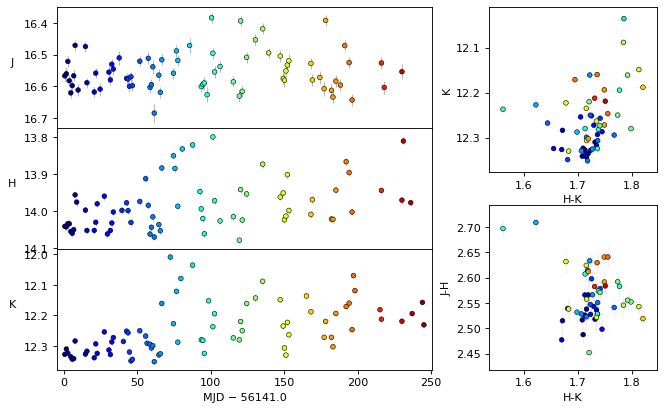

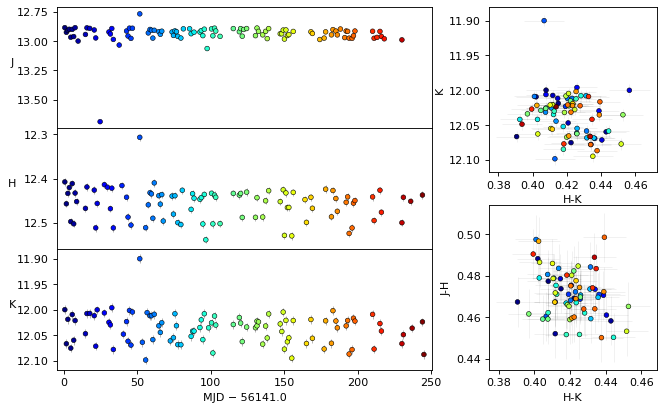

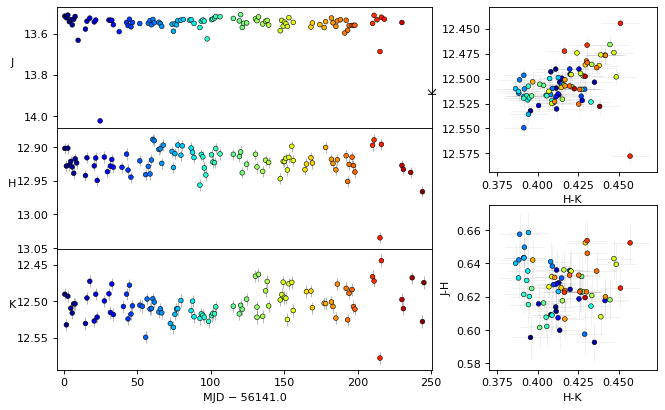

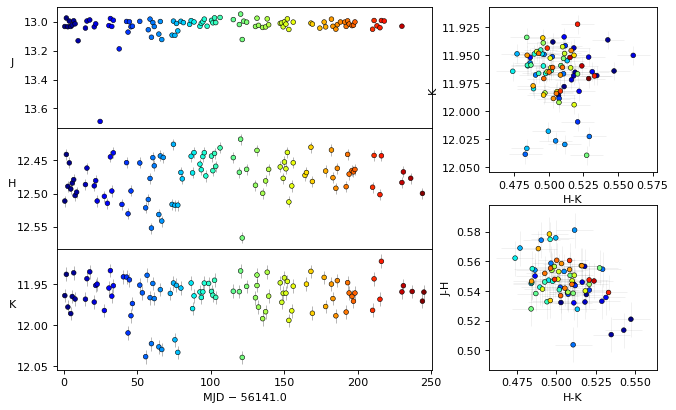

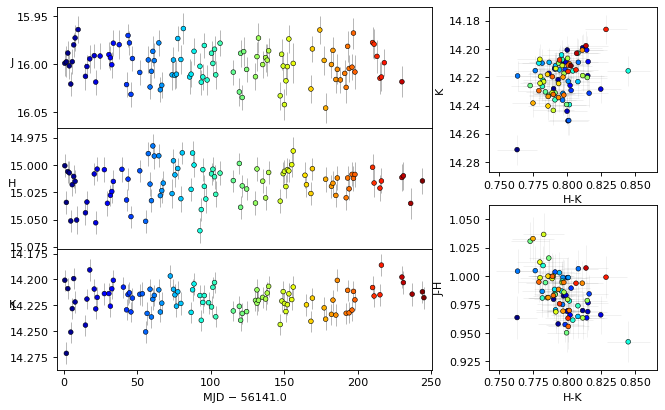

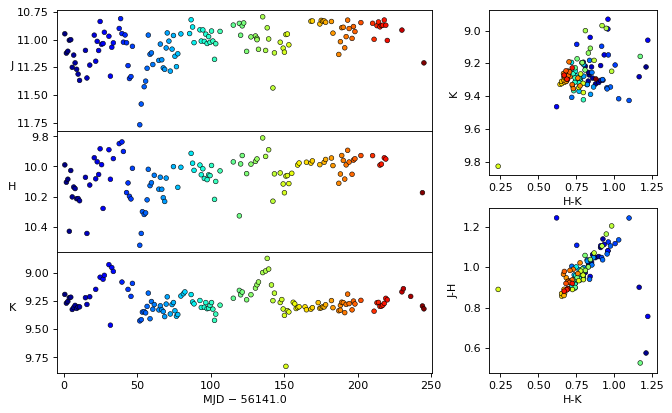

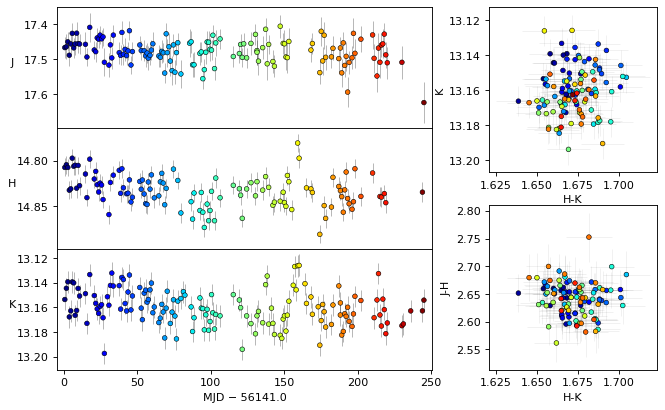

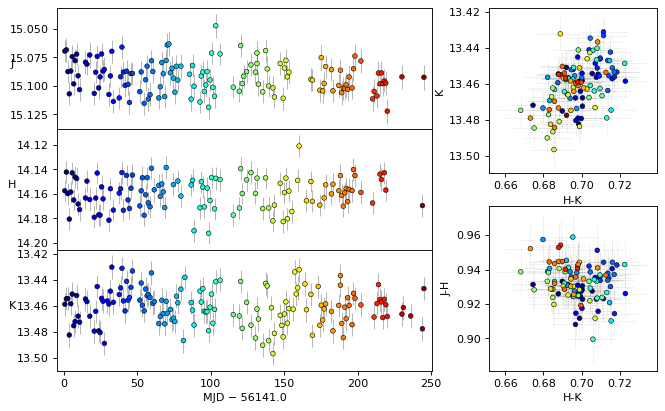

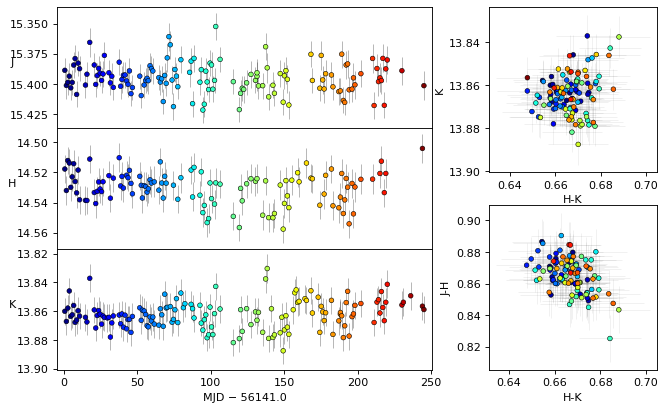

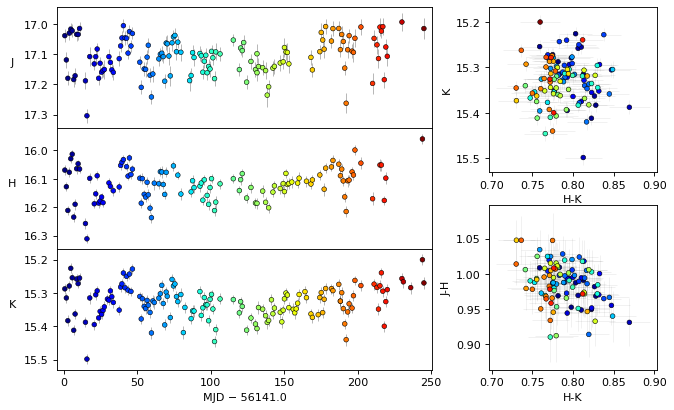

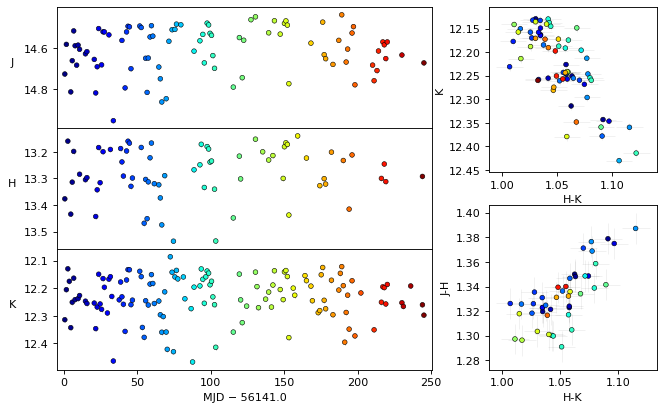

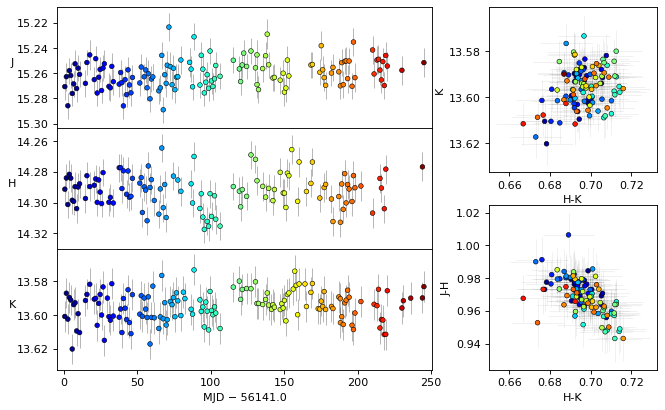

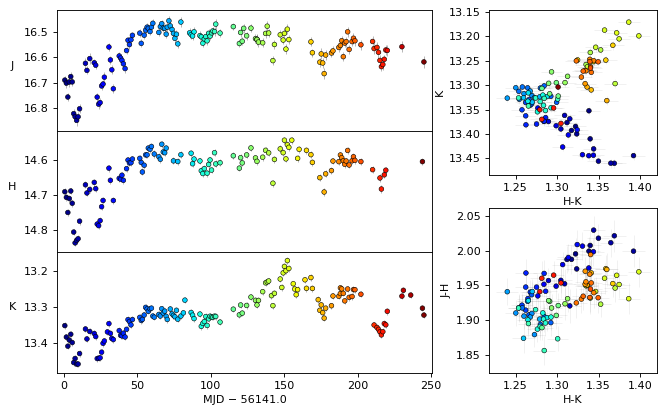

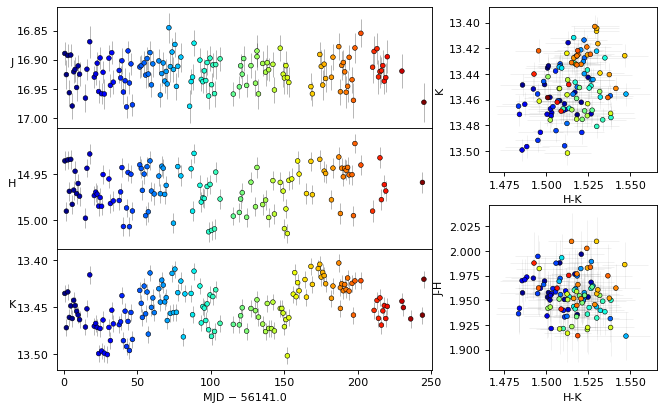

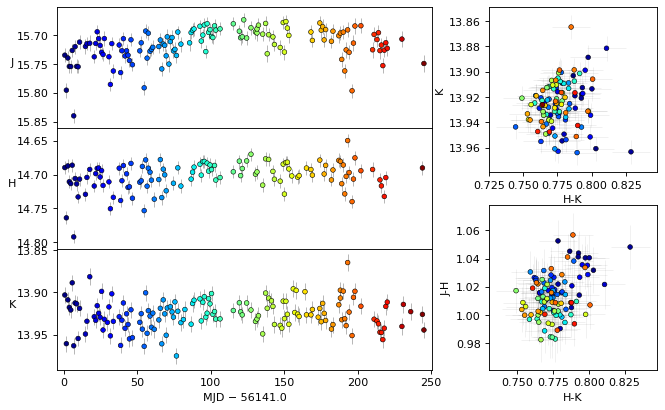

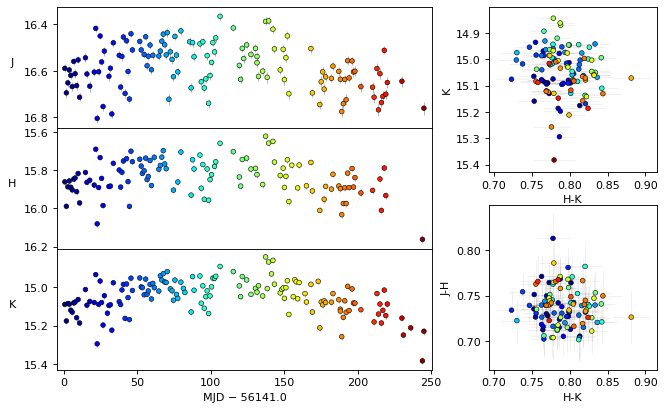

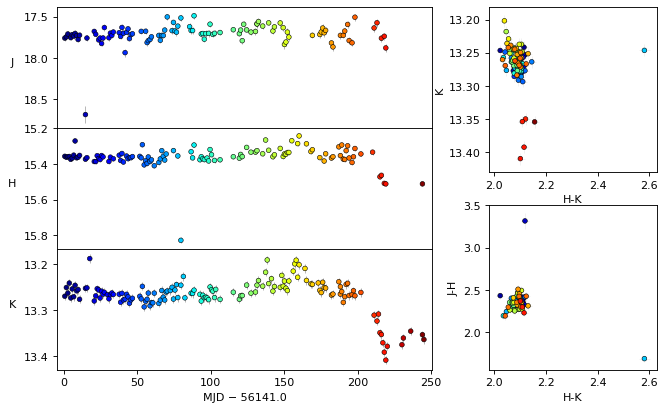

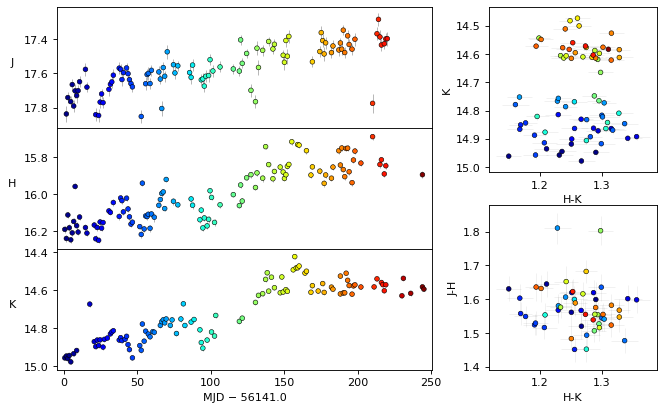

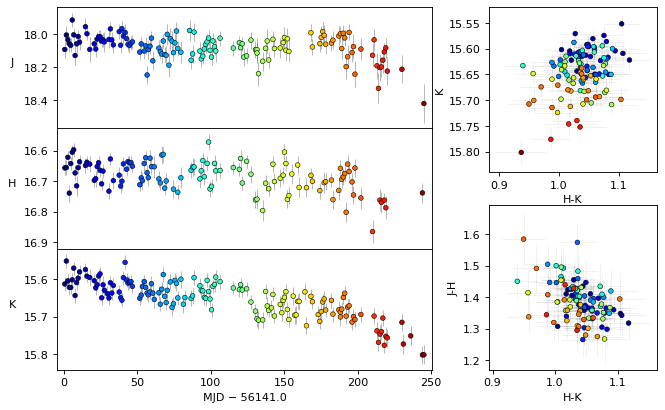

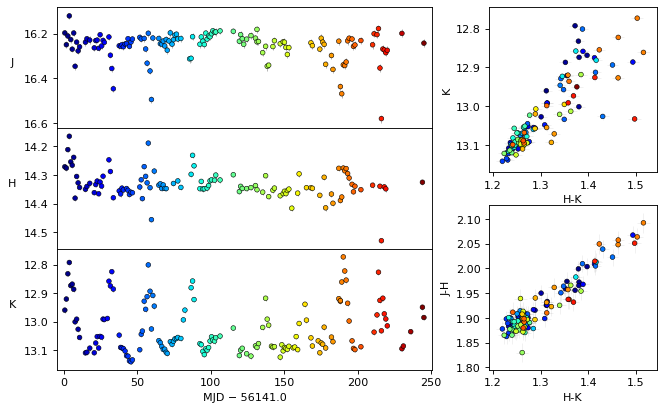

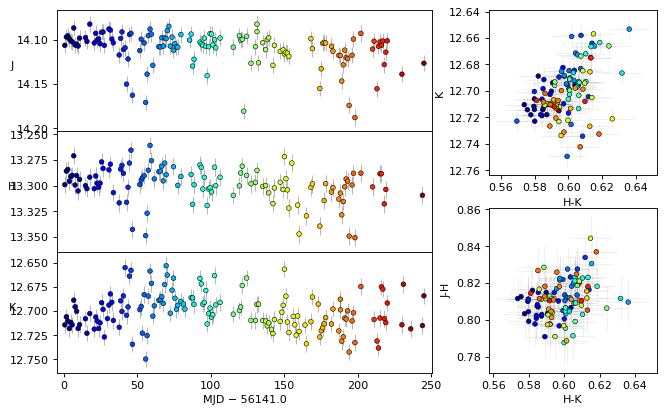

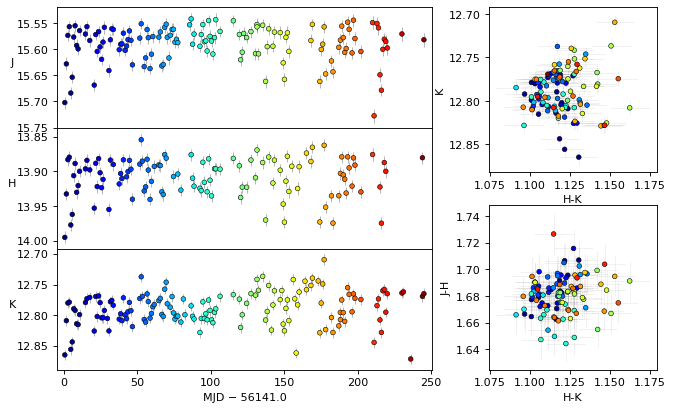

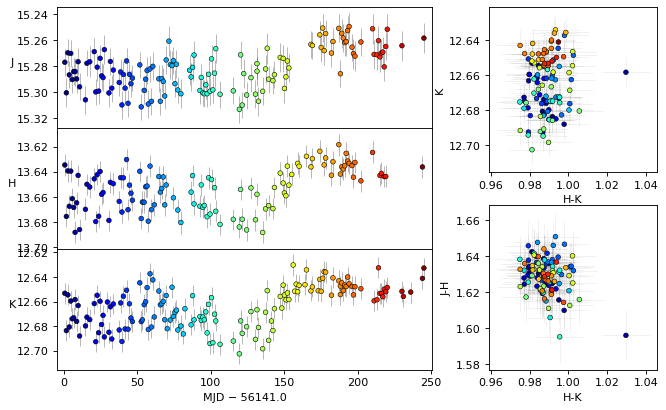

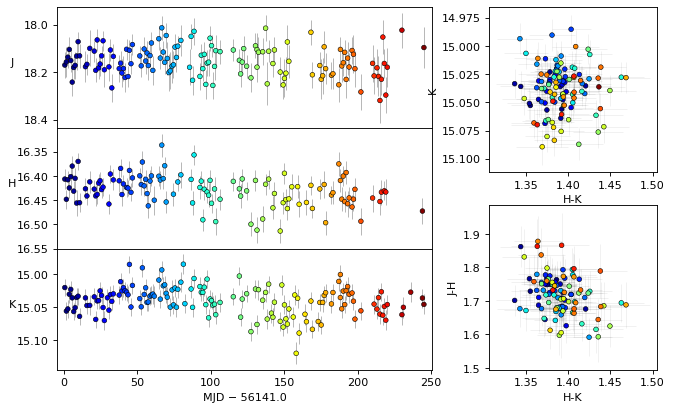

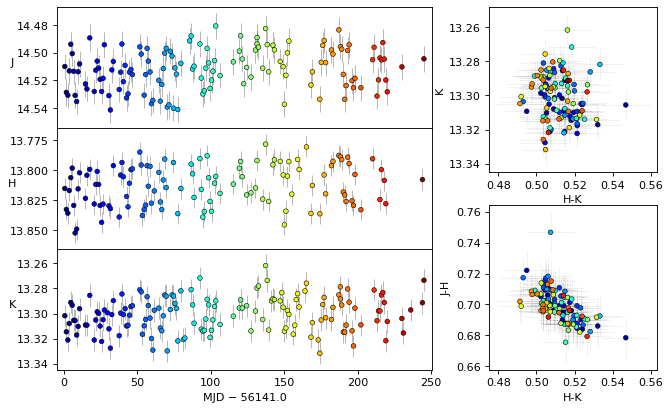

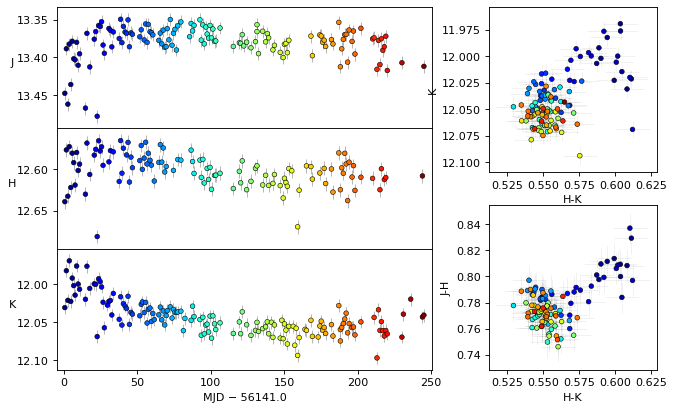

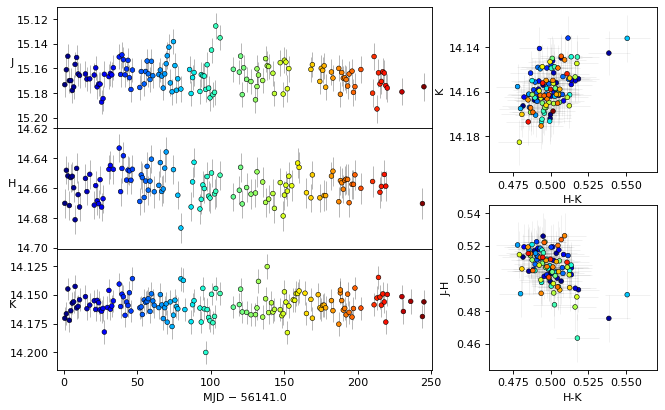

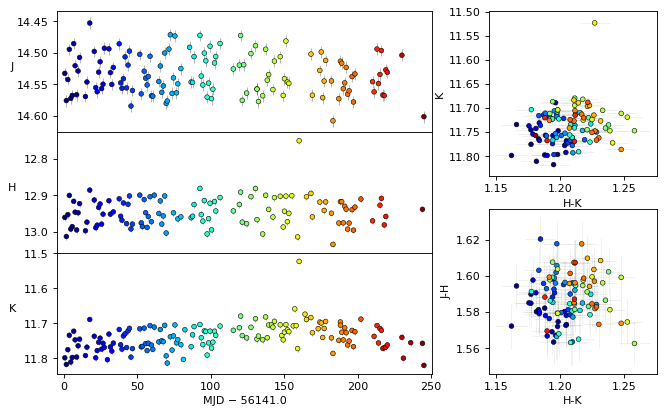

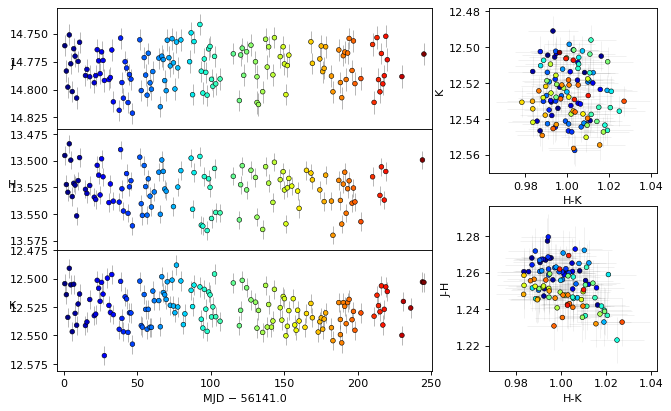

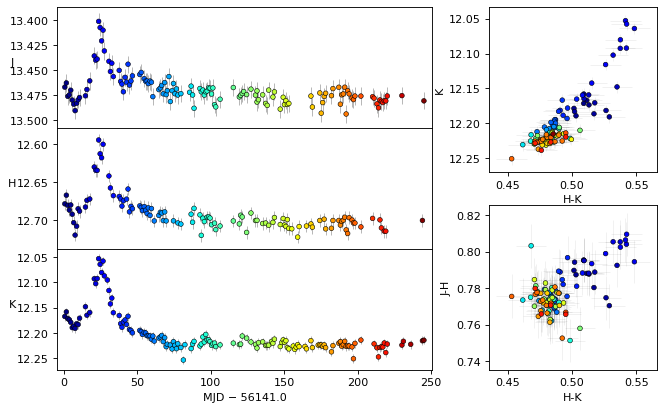

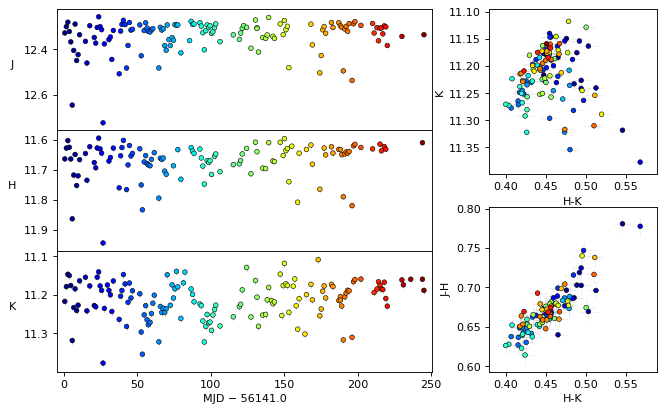

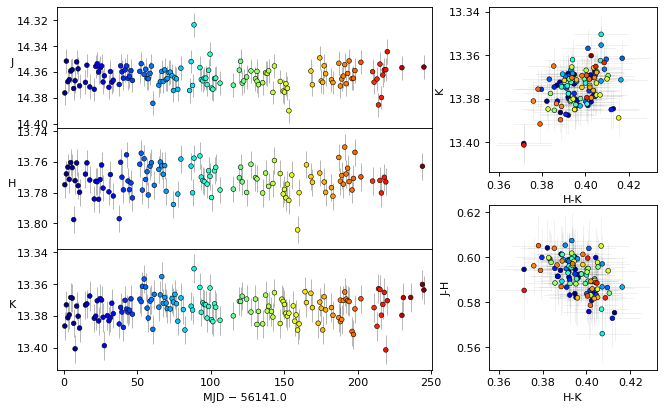

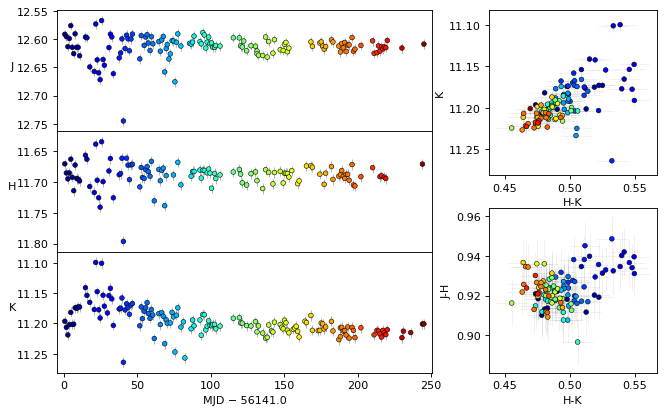

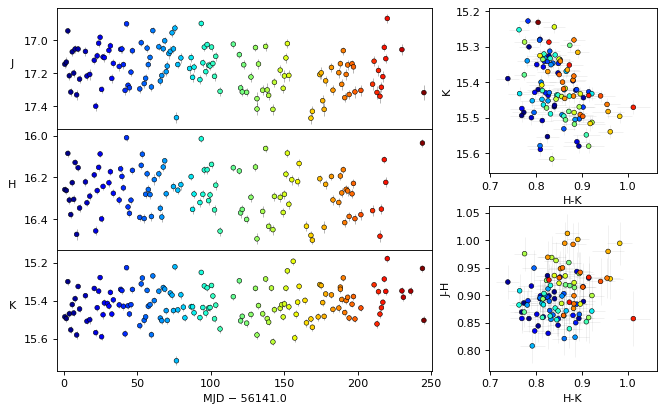

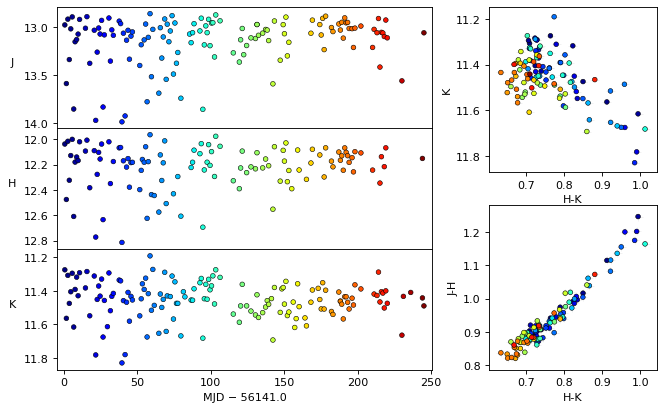

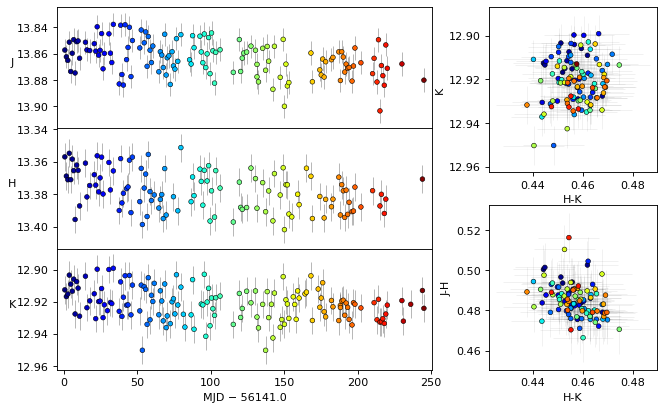

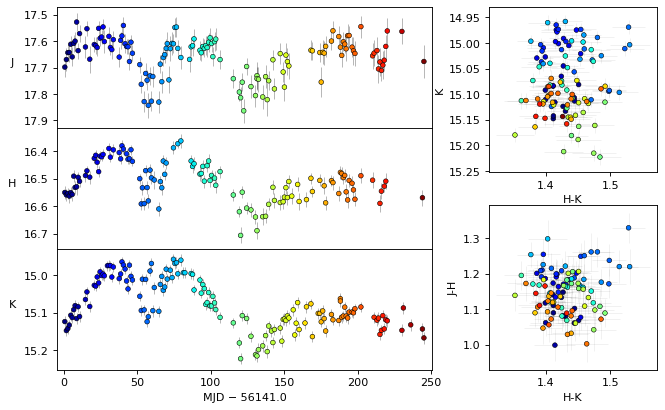

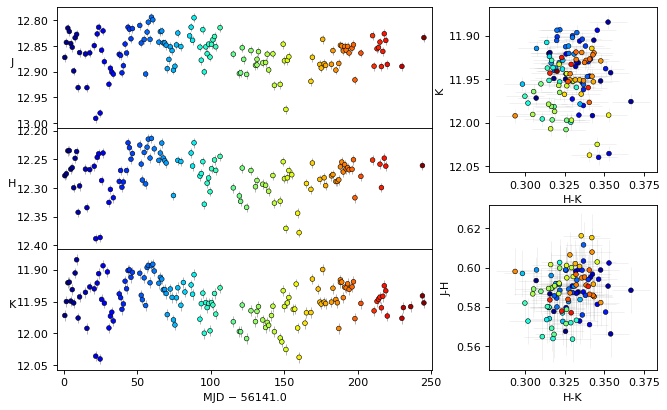

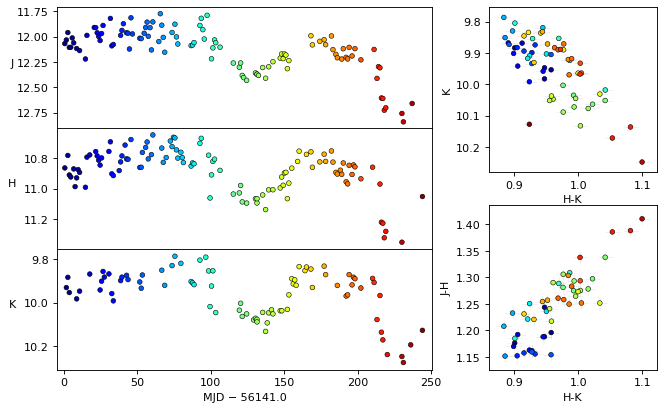

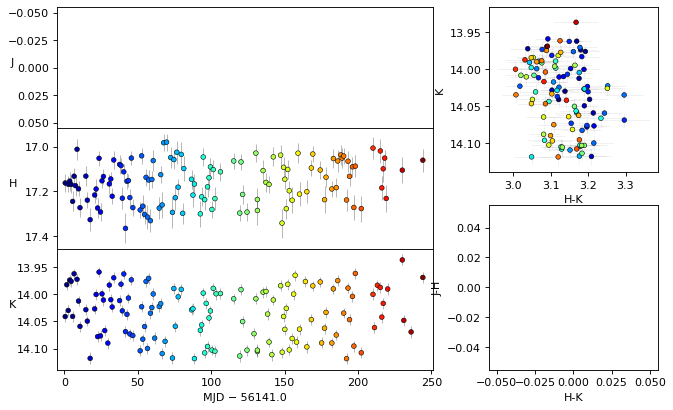

In [188]:
# All the variable lightcurves (no finessing around periodicity):



sids = ds[all_variables].index
dg = dict_dict[wserv]['dat']

for sid in sids:
    print(sid)
    fig = simple_lc_scatter_brokenaxes(dg, sid, cmap=dict_dict[wserv]['cmap'], breaks=dict_dict[wserv]['breaks'])
    